In [625]:
!pip cache purge

Files removed: 1959


In [626]:
!pip install catboost

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 466.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.5 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.2/15.5 MB 2.1 MB/s eta 0:00:08
    --------------------------------------- 0.3/15.5 MB 2.0 MB/s eta 0:00:08
    --------------------------------------- 0.4/15.5 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/15.5 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.6/15.5 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/15.5 MB 2.4 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/15.5 MB 2.8 MB/s eta 0:00:06
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.31.1 which is incompatible.


In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

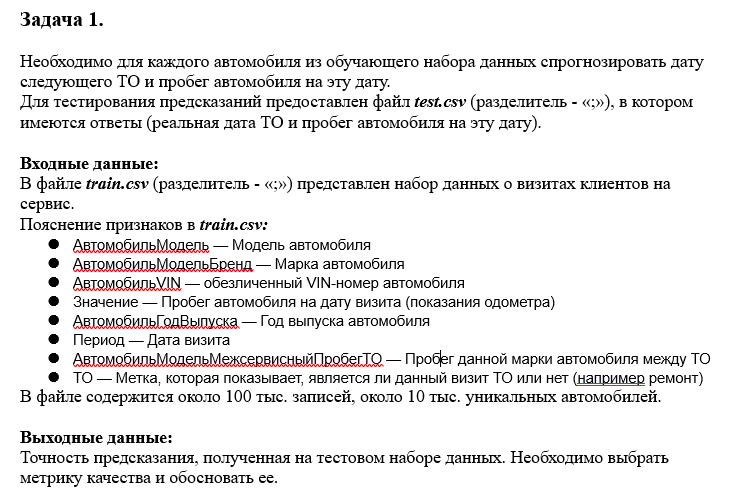

In [451]:
train = pd.read_excel('train.xlsx', index_col=0)
test = pd.read_excel('test.xlsx', index_col=0)

In [452]:
train.dtypes

АвтомобильМодель                                object
АвтомобильМодельБренд                           object
АвтомобильVIN                                    int64
Значение                                       float64
АвтомобильГодВыпуска                            object
Период                                  datetime64[ns]
АвтомобильМодельМежсервисныйПробегТО             int64
ТО                                              object
dtype: object

In [453]:
train['ТО'] = train['ТО'].replace({'Да': 1, 'Нет': 0})
test['ТО'] = test['ТО'].replace({'Да': 1, 'Нет': 0})

C:\Users\PCUserName\AppData\Local\Temp\ipykernel_21564\1048108718.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['ТО'] = train['ТО'].replace({'Да': 1, 'Нет': 0})
C:\Users\PCUserName\AppData\Local\Temp\ipykernel_21564\1048108718.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['ТО'] = test['ТО'].replace({'Да': 1, 'Нет': 0})


In [454]:
train['АвтомобильГодВыпуска'] = train['АвтомобильГодВыпуска'].replace('01.01.1014 0:00:00', '2014-01-01 00:00:00')
test['АвтомобильГодВыпуска'] = test['АвтомобильГодВыпуска'].replace('01.01.1014 0:00:00', '2014-01-01 00:00:00')

In [455]:
train['АвтомобильГодВыпуска'] = pd.to_datetime(train['АвтомобильГодВыпуска']).dt.year
test['АвтомобильГодВыпуска'] = pd.to_datetime(test['АвтомобильГодВыпуска']).dt.year

In [ ]:
# test.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)
# train.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)

In [456]:
train.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,LADA Largus Caravan (7м),LADA,27837,29644,2014,2015-08-03,15000,0
1,LADA Largus Caravan (7м),LADA,27837,29644,2014,2015-08-06,15000,1
2,LADA Largus Caravan (7м),LADA,27837,62152,2014,2016-04-28,15000,0
3,LADA Largus Caravan (7м),LADA,27837,104743,2014,2016-12-09,15000,1
4,УАЗ Patriot 3163,УАЗ,28253,29979,2016,2018-01-27,15000,1


In [457]:
test.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,Hyundai Solaris HCR,Hyundai,45459,45986,2017,2018-06-24,15000,1
1,Hyundai Sonata VI,Hyundai,11029,40193,2011,2015-03-15,15000,1
2,Hyundai Santa Fe II,Hyundai,11597,56355,2012,2019-09-11,15000,1
3,Hyundai Elantra V,Hyundai,10664,179260,2013,2018-10-23,15000,1
4,Hyundai Solaris Sedan,Hyundai,40022,45120,2016,2018-06-09,15000,1


Проверим тренировочные данные на наличие пропусков

In [458]:
train.isna().sum()

АвтомобильМодель                          0
АвтомобильМодельБренд                     0
АвтомобильVIN                             0
Значение                                404
АвтомобильГодВыпуска                      0
Период                                    0
АвтомобильМодельМежсервисныйПробегТО      0
ТО                                        0
dtype: int64

В колонке Значение есть 404 пропущенных значения

Построим график на определение наличия выбросов

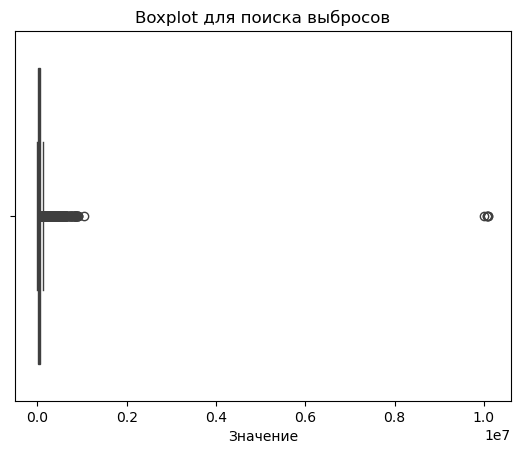

In [459]:
import seaborn as sns

sns.boxplot(x=train['Значение'])
plt.title('Boxplot для поиска выбросов')
plt.show()

Видно, что в данных есть выбросы с очень большими значениями

Также посмотрим на общее описание распределения значений пробега

In [460]:
pd.options.display.float_format = '{:.0f}'.format
print(train['Значение'].describe())

count     108832
mean       49150
std        87625
min            0
25%        14729
50%        32174
75%        63000
max     10099765
Name: Значение, dtype: float64


In [461]:
train.loc[train['Значение'].idxmax()]['АвтомобильГодВыпуска']

2007

Пробег 10 млн км не кажется нормальным для машины 2007 года выпуска, поэтому считаем эти данные выбросом. Так как в данных есть выбросы, заполним пропуски медианным значением колонки.

In [462]:
med  = train['Значение'].median()
train['Значение'] = train['Значение'].fillna(med)

Посмотрим, те же самые автомобили лежат в тесте или нет

In [463]:
VIN_train = train['АвтомобильVIN'].unique()

In [464]:
VIN_test = train['АвтомобильVIN'].unique()

In [465]:
intersection = (set(VIN_train))&(set(VIN_test))

In [466]:
len(intersection)

10478

В test лежат те же самые уникальные автомобили из train

In [467]:
print(len(train['АвтомобильVIN'].unique()), len(test['АвтомобильVIN'].unique()))

10478 10478


Посмотрим, есть ли машины, ни разу не проходившие ТО

In [468]:
cars_group = train.groupby('АвтомобильVIN')['ТО'].sum().reset_index()
cars_without_TO = cars_group[cars_group['ТО'] == 0]['АвтомобильVIN']
cars_without_TO

Series([], Name: АвтомобильVIN, dtype: int64)

Таких машин нет

Создадим новый датафрейм cars_info, который будет содержать некоторые колонки train плюс новые

In [469]:
cars_info = pd.DataFrame()
TO_data = train[train['ТО'] == 1]
last_TO = TO_data.groupby('АвтомобильVIN')['Период'].idxmax()
cars_info = TO_data.loc[last_TO]


Теперь колонка Период это последняя дата ТО для каждого автомобиля

In [ ]:
# train.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)
# two_visits = train.groupby('АвтомобильVIN')['Период'].agg(['max', 'min']).reset_index()
# two_visits = two_visits.reset_index()
# days_diff = (two_visits['max'] - two_visits['min']).dt.days

In [ ]:
# train.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)
# km = train.groupby('АвтомобильVIN')['Значение'].agg(['max', 'min']).reset_index()
# km = km.reset_index()
# km_diff = km['max'] - km['min']
# km_diff = km_diff.replace(0, 1)
# min(km_diff)

1.0

Закомментировнные ячейки мне нужны были, чтобы попробовать сделать доп признаки другие, на основе которых можно делать предсказания. Однако, результат получился схожий с итоговым. Лучше получить не удалось

In [470]:
cars_info = cars_info.reset_index(drop=True)

In [471]:
cars_info.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
0,Toyota Estima,TOYOTA,35,210527,2014,2019-05-14,10000,1
1,Lexus RX III 350,LEXUS,41,84251,2009,2018-04-16,10000,1
2,Lexus RX III 350,LEXUS,42,70751,2011,2019-03-17,10000,1
3,Lexus RX II 330,LEXUS,49,182240,2004,2018-01-25,10000,1
4,Lexus RX II 330,LEXUS,50,120962,2003,2017-06-17,10000,1


In [ ]:
# import math
# avg_km_per_day = [math.ceil(km_diff[i]/days_diff[i]) for i in range (len(km_diff))]
# cars_info['СреднийПробегВДень'] = avg_km_per_day
# num_days = [math.ceil(cars_info.loc[i, 'АвтомобильМодельМежсервисныйПробегТО']/cars_info.loc[i, 'СреднийПробегВДень']) for i in range (len(cars_info))]
# min(cars_info['СреднийПробегВДень'])

In [ ]:
# cars_info['СледующееТО'] = cars_info['Период'] + pd.to_timedelta(num_days, unit='D')
# cars_info['СледующийПробег'] = cars_info['Значение'] + cars_info['АвтомобильМодельМежсервисныйПробегТО']

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error
# base_date = pd.to_datetime('2000-01-01')
# print('Ошибка на пробеге: ', mean_absolute_percentage_error(test['Значение'], cars_info['СледующийПробег']))
# print('Ошибка на дате: ', mean_absolute_percentage_error((test['Период'] - base_date).dt.days, (cars_info['СледующееТО'] - base_date).dt.days))

Таргет - колонки Значение и Период

In [472]:
train = train.reset_index(drop = True)

Создадим для каждого автомобиля колонки ПредыдущееТО и СледующееТО (это одна из целевых переменных) в тренировочных данных.

In [473]:
import pandas as pd
to_data = train[train['ТО'] == 1].copy()
to_data['Период'] = pd.to_datetime(to_data['Период'])
to_data.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)

In [474]:
last_two_TO = to_data.groupby('АвтомобильVIN')['Период'].apply(lambda x: x.tail(2)).reset_index()
last_two_TO = last_two_TO.drop(columns='level_1') \
    .rename(columns={'Период': 'last_TO'})
last_two_TO['prev_TO'] = last_two_TO.groupby('АвтомобильVIN')['last_TO'].shift(1)
vin_to_year = train[['АвтомобильVIN', 'АвтомобильГодВыпуска']].drop_duplicates()
last_two_TO = last_two_TO.merge(vin_to_year, on='АвтомобильVIN', how='left')
last_two_TO['prev_TO'] = last_two_TO['prev_TO'].fillna(last_two_TO['АвтомобильГодВыпуска'])
last_two_TO = last_two_TO.drop_duplicates(subset=['АвтомобильVIN'], keep='last')

In [475]:
last_two_TO = last_two_TO.reset_index(drop=True)
cars_info = cars_info.reset_index(drop=True)

In [476]:
cars_info['ПредыдущееТО'] = last_two_TO['prev_TO']
cars_info['СледующееТО'] = last_two_TO['last_TO']

In [477]:
cars_info.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО,ПредыдущееТО,СледующееТО
0,Toyota Estima,TOYOTA,35,210527,2014,2019-05-14,10000,1,2018-09-11 00:00:00,2019-05-14
1,Lexus RX III 350,LEXUS,41,84251,2009,2018-04-16,10000,1,2015-02-04 00:00:00,2018-04-16
2,Lexus RX III 350,LEXUS,42,70751,2011,2019-03-17,10000,1,2018-10-13 00:00:00,2019-03-17
3,Lexus RX II 330,LEXUS,49,182240,2004,2018-01-25,10000,1,2017-06-22 00:00:00,2018-01-25
4,Lexus RX II 330,LEXUS,50,120962,2003,2017-06-17,10000,1,2016-06-17 00:00:00,2017-06-17


Создадим для каждого автомобиля колонки ПредыдущийПробег и СледующийПробег (это другая целевая переменная) в тренировочных данных.

In [478]:
last_two_TO['prev_TO'] = pd.to_datetime(last_two_TO['prev_TO'])
last_two_TO['last_TO'] = pd.to_datetime(last_two_TO['last_TO'])

prev_TO_mileage = to_data[['АвтомобильVIN', 'Период', 'Значение']] \
    .rename(columns={'Период': 'prev_TO', 'Значение': 'prev_TO_Пробег'})

prev_TO_mileage['prev_TO'] = pd.to_datetime(prev_TO_mileage['prev_TO'])

last_two_TO = last_two_TO.merge(prev_TO_mileage, on=['АвтомобильVIN', 'prev_TO'], how='left')
last_two_TO['prev_TO_Пробег'] = last_two_TO['prev_TO_Пробег'].fillna(0)

last_TO_mileage = to_data[['АвтомобильVIN', 'Период', 'Значение']] \
    .rename(columns={'Период': 'last_TO', 'Значение': 'last_TO_Пробег'})
last_TO_mileage['last_TO'] = pd.to_datetime(last_TO_mileage['last_TO'])

last_two_TO = last_two_TO.merge(last_TO_mileage, on=['АвтомобильVIN', 'last_TO'], how='left')
last_two_TO['last_TO_Пробег'] = last_two_TO['last_TO_Пробег'].fillna(0)

In [479]:
last_two_TO.head()

,АвтомобильVIN,last_TO,prev_TO,АвтомобильГодВыпуска,prev_TO_Пробег,last_TO_Пробег
0,35,2019-05-14,2018-09-11,2014,200778,210527
1,41,2018-04-16,2015-02-04,2009,62108,84251
2,42,2019-03-17,2018-10-13,2011,61855,70751
3,49,2018-01-25,2017-06-22,2004,169997,182240
4,50,2017-06-17,2016-06-17,2003,118472,120962


In [480]:
cars_info['ПредыдущийПробег'] = last_two_TO['prev_TO_Пробег']
cars_info['СледующийПробег'] = last_two_TO['last_TO_Пробег']

In [481]:
cars_info.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО,ПредыдущееТО,СледующееТО,ПредыдущийПробег,СледующийПробег
0,Toyota Estima,TOYOTA,35,210527,2014,2019-05-14,10000,1,2018-09-11 00:00:00,2019-05-14,200778,210527
1,Lexus RX III 350,LEXUS,41,84251,2009,2018-04-16,10000,1,2015-02-04 00:00:00,2018-04-16,62108,84251
2,Lexus RX III 350,LEXUS,42,70751,2011,2019-03-17,10000,1,2018-10-13 00:00:00,2019-03-17,61855,70751
3,Lexus RX II 330,LEXUS,49,182240,2004,2018-01-25,10000,1,2017-06-22 00:00:00,2018-01-25,169997,182240
4,Lexus RX II 330,LEXUS,50,120962,2003,2017-06-17,10000,1,2016-06-17 00:00:00,2017-06-17,118472,120962


In [482]:
cars_info = cars_info.drop(['Период', 'Значение', 'ТО'], axis = 1)

In [483]:
cars_info.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,АвтомобильГодВыпуска,АвтомобильМодельМежсервисныйПробегТО,ПредыдущееТО,СледующееТО,ПредыдущийПробег,СледующийПробег
0,Toyota Estima,TOYOTA,35,2014,10000,2018-09-11 00:00:00,2019-05-14,200778,210527
1,Lexus RX III 350,LEXUS,41,2009,10000,2015-02-04 00:00:00,2018-04-16,62108,84251
2,Lexus RX III 350,LEXUS,42,2011,10000,2018-10-13 00:00:00,2019-03-17,61855,70751
3,Lexus RX II 330,LEXUS,49,2004,10000,2017-06-22 00:00:00,2018-01-25,169997,182240
4,Lexus RX II 330,LEXUS,50,2003,10000,2016-06-17 00:00:00,2017-06-17,118472,120962


Теперь cars_info является тренировочным датасетом, где колонки СледующееТО и СледующийПробег являются целевыми переменными.

In [484]:
test.sort_values(by=['АвтомобильVIN', 'Период'], inplace=True)

In [485]:
test.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ТО
5273,Toyota Estima,TOYOTA,35,219645,2014,2019-07-24,10000,1
1034,Lexus RX III 350,LEXUS,41,94757,2009,2018-08-04,10000,1
62,Lexus RX III 350,LEXUS,42,79202,2011,2019-06-15,10000,1
5676,Lexus RX II 330,LEXUS,49,196234,2004,2018-08-19,10000,1
7208,Lexus RX II 330,LEXUS,50,121331,2003,2017-06-18,10000,1


In [486]:
test = test.drop(['ТО'], axis = 1)

Также сделаем колонки ПредыдущееТО и ПредыдущийПробег для test, причем ПредыдущееТО в test это СледующееТО в train, так как по задаче нам надо предсказать дату следующего ТО после последнего ТО из train. Аналогично с колонкой ПредыдущийПробег в test. В test таргетом останутся Период и Значение.

In [487]:
test = test.reset_index(drop = True)
test['ПредыдущийПробег'] = cars_info['СледующийПробег']
test['ПредыдущееТО'] = cars_info['СледующееТО']

In [488]:
test.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ПредыдущийПробег,ПредыдущееТО
0,Toyota Estima,TOYOTA,35,219645,2014,2019-07-24,10000,210527,2019-05-14
1,Lexus RX III 350,LEXUS,41,94757,2009,2018-08-04,10000,84251,2018-04-16
2,Lexus RX III 350,LEXUS,42,79202,2011,2019-06-15,10000,70751,2019-03-17
3,Lexus RX II 330,LEXUS,49,196234,2004,2018-08-19,10000,182240,2018-01-25
4,Lexus RX II 330,LEXUS,50,121331,2003,2017-06-18,10000,120962,2017-06-17


Переведем колонки с типом datetime в количество дней, прошедших с 01.01.2000, для корректной работы модели.

In [489]:
base_date = pd.to_datetime("2000-01-01")
cars_info["ПредыдущееТО"] = (pd.to_datetime(cars_info["ПредыдущееТО"])-base_date).dt.days
cars_info["СледующееТО"] = (pd.to_datetime(cars_info["СледующееТО"])-base_date).dt.days

test["ПредыдущееТО"] = cars_info['СледующееТО']
test["Период"] = (pd.to_datetime(test["Период"])-base_date).dt.days


In [490]:
test.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,Значение,АвтомобильГодВыпуска,Период,АвтомобильМодельМежсервисныйПробегТО,ПредыдущийПробег,ПредыдущееТО
0,Toyota Estima,TOYOTA,35,219645,2014,7144,10000,210527,7073
1,Lexus RX III 350,LEXUS,41,94757,2009,6790,10000,84251,6680
2,Lexus RX III 350,LEXUS,42,79202,2011,7105,10000,70751,7015
3,Lexus RX II 330,LEXUS,49,196234,2004,6805,10000,182240,6599
4,Lexus RX II 330,LEXUS,50,121331,2003,6378,10000,120962,6377


Разделим данные на X_train, y_train, x_test, y_test.

In [491]:
X_train = cars_info.drop(['СледующийПробег', 'СледующееТО'], axis = 1)
y_train = cars_info[['СледующийПробег', 'СледующееТО']]
x_test = test.drop(['Значение', 'Период'], axis = 1)
y_test = test[['Значение', 'Период']]

In [492]:
y_test

,Значение,Период
0,219645,7144
1,94757,6790
2,79202,7105
3,196234,6805
4,121331,6378
...,...,...
10473,45039,7103
10474,45804,7175
10475,120048,6495
10476,45256,7054


Так как нам надо предсказать сразу несколько параметров, можно использовать модель MultiTaskElasticNet из модуля linear_model библиотеки sklearn.

In [493]:
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

In [494]:
cat_features = X_train.select_dtypes(include='object').columns.tolist()

In [496]:
cars_info.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,АвтомобильГодВыпуска,АвтомобильМодельМежсервисныйПробегТО,ПредыдущееТО,СледующееТО,ПредыдущийПробег,СледующийПробег
0,Toyota Estima,TOYOTA,35,2014,10000,6828,7073,200778,210527
1,Lexus RX III 350,LEXUS,41,2009,10000,5513,6680,62108,84251
2,Lexus RX III 350,LEXUS,42,2011,10000,6860,7015,61855,70751
3,Lexus RX II 330,LEXUS,49,2004,10000,6382,6599,169997,182240
4,Lexus RX II 330,LEXUS,50,2003,10000,6012,6377,118472,120962


In [497]:
X_train.head()

,АвтомобильМодель,АвтомобильМодельБренд,АвтомобильVIN,АвтомобильГодВыпуска,АвтомобильМодельМежсервисныйПробегТО,ПредыдущееТО,ПредыдущийПробег
0,Toyota Estima,TOYOTA,35,2014,10000,6828,200778
1,Lexus RX III 350,LEXUS,41,2009,10000,5513,62108
2,Lexus RX III 350,LEXUS,42,2011,10000,6860,61855
3,Lexus RX II 330,LEXUS,49,2004,10000,6382,169997
4,Lexus RX II 330,LEXUS,50,2003,10000,6012,118472


In [498]:
y_train.head()

,СледующийПробег,СледующееТО
0,210527,7073
1,84251,6680
2,70751,7015
3,182240,6599
4,120962,6377


In [499]:
model = CatBoostRegressor(cat_features = cat_features)
model = MultiOutputRegressor(model)
model.fit(X_train, y_train)

Learning rate set to 0.059345
0:	learn: 108708.3146506	total: 20.9ms	remaining: 20.8s
1:	learn: 106730.0211182	total: 38.5ms	remaining: 19.2s
2:	learn: 104693.1337266	total: 57.8ms	remaining: 19.2s
3:	learn: 102713.3197838	total: 81.9ms	remaining: 20.4s
4:	learn: 100821.9157170	total: 102ms	remaining: 20.4s
5:	learn: 98960.4250050	total: 123ms	remaining: 20.4s
6:	learn: 97582.0660496	total: 144ms	remaining: 20.5s
7:	learn: 95955.8900569	total: 167ms	remaining: 20.7s
8:	learn: 94283.2029076	total: 193ms	remaining: 21.2s
9:	learn: 92594.2285738	total: 219ms	remaining: 21.7s
10:	learn: 91287.9715057	total: 243ms	remaining: 21.8s
11:	learn: 89721.6274339	total: 264ms	remaining: 21.7s
12:	learn: 88498.5436201	total: 286ms	remaining: 21.7s
13:	learn: 86920.6257752	total: 311ms	remaining: 21.9s
14:	learn: 85532.6681314	total: 336ms	remaining: 22.1s
15:	learn: 84071.2451902	total: 356ms	remaining: 21.9s
16:	learn: 82751.1917408	total: 374ms	remaining: 21.6s
17:	learn: 81625.9411490	total: 394m

MultiOutputRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x000002D9961B33B0>)

In [500]:
y_pred = model.predict(x_test)

In [510]:
pred = pd.DataFrame(y_pred)
pred.head()

,0,1
0,213065,7222
1,90604,6883
2,74288,7124
3,187546,6908
4,121960,6699


In [511]:
pred = pred.rename(columns={0: 'Значение', 1: 'Период'})
pred.head()

,Значение,Период
0,213065,7222
1,90604,6883
2,74288,7124
3,187546,6908
4,121960,6699


Для оценивания работы модели будем использовать метрику MAPE (mean absolute percentage error), так как она наглядно показывает, насколько сильно предсказанные данные отличаются от реальных. Эта метрика, на мой взгляд, понятнее, чем MSE, RMSE, по которым не так просто понять, насколько хорошо работает модель, так как там не процентное соотношение, а просто какое-то число

In [512]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test['Период'], pred['Период']))
print(mean_absolute_percentage_error(y_test['Значение'], pred['Значение']))

0.015335925429830992
4.534428944516553


Ошибка на предсказании даты следующего ТО составляет 1.5% (соответственно точность предсказания 98.5%),  в то время как на пробеге ошибка 453%. Я пробовала разные методы предсказания. В том числе и предсказывать пробег прибавлением межсервисного пробега к  текущему, а потом на основе среднего пробега в день у данного автомобиля предсказывать дату, но в этом случае также дата предсказывалась достаточно точно, а на пробеге все равно была ошибка +- такая. 

На мой взгляд, предсказание пробега достаточно странная вещь, так как например был автомобиль, который между двумя датами посещения сервиса не проехал ни 1 км, или  ТО должно быть каждые 10000 км, а автомобиль за это время проехал только 1000. И вообще, у одного владельца машина может большую часть времени стоять в гараже, а у другого эта же машина может ездить по 100 км в день. В данном случае на основе небольшого кол-ва исторических данных предсказать такую величину непросто.

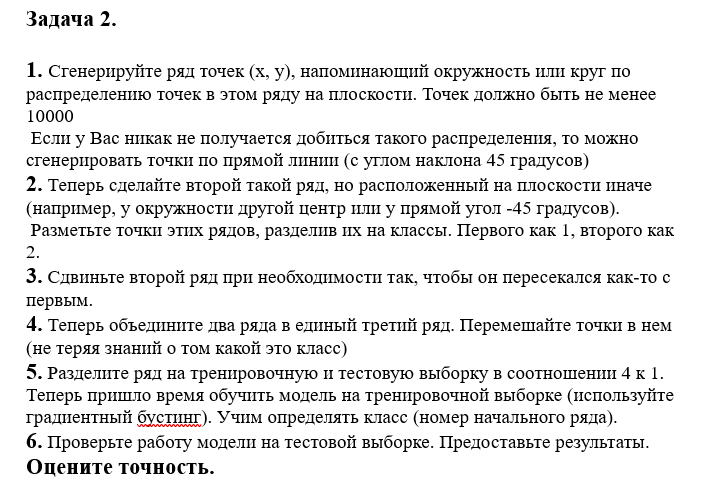

Генерация точек

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


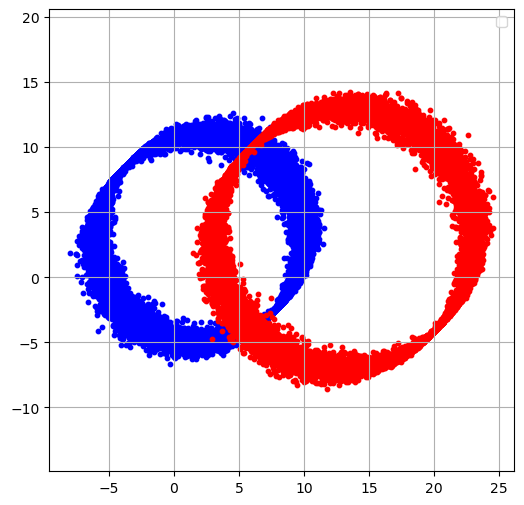

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_circle(n_points, r, center):
    angles = np.linspace(0, 2 * np.pi, n_points)
    noise = np.random.normal(0, 0.5, n_points)
    x = center[0] + r * np.cos(angles) + noise
    y = center[1] + r * np.sin(angles) + noise
    return x, y

plt.figure(figsize=(6,6))
circle_1 = create_circle(10100, 8, (2, 3))
circle_2 = create_circle(10200, 10, (13, 3))
plt.scatter(circle_1[0], circle_1[1], s=10, c='blue')
plt.scatter(circle_2[0], circle_2[1], s=10, c='red')
plt.axis('equal') 
plt.legend()
plt.grid(True)
plt.show()

Сформируем датасет

In [ ]:
import pandas as pd
data_1 = pd.DataFrame()
data_2 = pd.DataFrame()
data_1['x'] = circle_1[0]
data_1['y'] = circle_1[1]
data_1['target'] = 1
data_2['x'] = circle_2[0]
data_2['y'] = circle_2[1]
data_2['target'] = 2
data = pd.concat([data_1, data_2], ignore_index=True)

In [ ]:
data.head()

,x,y,target
0,0.112167,10.462705,1
1,-4.973393,0.868861,1
2,4.301249,-4.098540,1
3,8.637624,-1.514025,1
4,2.441423,-5.053303,1


Перемешаем данные в датасете

In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
data.head()

,x,y,target
0,18.153543,13.247513,2
1,8.537192,-1.768798,1
2,6.330993,-3.527243,1
3,1.024850,10.974218,1
4,22.243443,1.623698,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(data[['x', 'y']], data['target']-1, test_size = 0.2, random_state = 42)   # '-1' делается для задачи классификации, так как модель работает с классами 0 и 1

Будем использовать модель XGBClassifier

In [ ]:
!pip install xgboost

Для начала попробуем модель с дефолтными параметрами. Если качество будет не высоким, будем подбирать их с помощью GridSearchCV

In [ ]:
from xgboost import XGBClassifier
model_clf = XGBClassifier()
model_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model_clf.predict(x_test)

Так как в датасете классы сбалансированны (так сгенерированы точки), можно использовать метрику accuracy для оценки качества работы модели. Также дополнительно посчитаем метрику precision.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9891625615763546
Precision:  0.9882063882063882


Модель отлично распознает классы точек, подбор параметров модели не требуется.